# Generate Synthetic Data for Tests

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datadrivenquadrature as ddq

In [2]:
def generate_spectra(x_idx, y_idx, s=1000):
    spectra = []
    x = np.arange(0, 12, 1./s)
    for val in x:
        if val < 8:
            spectra.append((-x_idx / 16.) * (val) * (val - 8))
        else:
            spectra.append((-y_idx / 4.) * (val - 8) * (val - 12))
    return spectra

def compute_exact_integral(x_idx, y_idx):
    return 16./3 * x_idx + 8./3 * y_idx

In [3]:
n = 10 # size of square block of data
s = 1000 # number of points on the integration axis
x_integrated = []
x_spectra = []

for y_idx in range(n):
    x_integrated_row = []
    x_spectra_row = []
    for x_idx in range(n):
        x_integrated_row.append(compute_exact_integral(x_idx + 1, y_idx + 1))
        x_spectra_row.append(generate_spectra(x_idx + 1, y_idx + 1, s))
    x_integrated.append(x_integrated_row)
    x_spectra.append(x_spectra_row)

x_range = np.arange(0, 12, 1./s)

x = xr.DataArray(x_spectra,
    dims=("x_idx", "y_idx", "integration_axis"), 
    coords={"x_idx": list(np.arange(1, n + 1, 1)),
             "y_idx": list(np.arange(1, n + 1, 1)),
             "integration_axis": x_range}
)
y = xr.DataArray(x_integrated,
    dims=("x_idx", "y_idx"), 
    coords={"x_idx": list(np.arange(1, n + 1, 1)),
             "y_idx": list(np.arange(1, n + 1, 1))}
)

[0.         0.00049994 0.00099975 ... 0.00299775 0.001999   0.00099975]


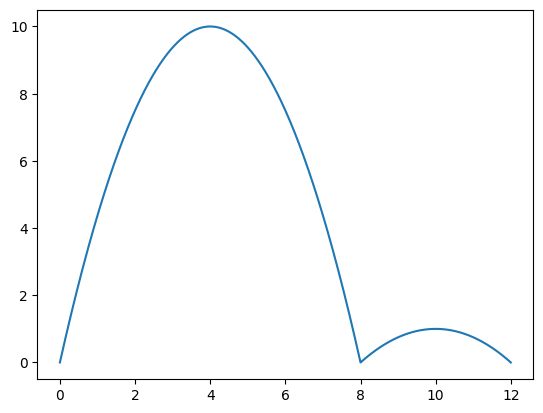

In [4]:
print(x[0][0].values)
plt.plot(x_range, x[0][9].values)

In [53]:
print(len(x.integration_axis))

12000
